In [1]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

import pandas as pd
import numpy as np
import string
import nltk
import re
from nltk.corpus import stopwords
stop = stopwords.words('english')

import seaborn as sns
import matplotlib.pyplot as plt    
from matplotlib import pyplot
from nltk.stem import PorterStemmer

from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.feature_extraction.text import TfidfVectorizer


from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn import model_selection
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split


sns.set_style("white")
sns.set_style("ticks")
fontsize = 14
figsize = (12,3)

data = pd.read_csv("spam.csv",encoding='latin-1')
data = data.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)
pd.set_option('display.max_colwidth', 0) 

data.columns =['label','body']
data['label_code'] = data['label'].astype('category').cat.as_ordered().cat.codes
data.head()

,label,body,label_code
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives around here though",0


### ham/spam distribution

Text(0.5, 1.0, 'Number of ham and spam messages')

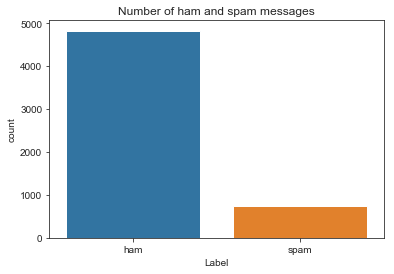

In [2]:
sns.countplot(data.label)
plt.xlabel('Label')
plt.title('Number of ham and spam messages')


### sample human messages

In [3]:
print(data[data['label']=='ham']['body'].head(10))

0     Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...                                                                                     
1     Ok lar... Joking wif u oni...                                                                                                                                                                       
3     U dun say so early hor... U c already then say...                                                                                                                                                   
4     Nah I don't think he goes to usf, he lives around here though                                                                                                                                       
6     Even my brother is not like to speak with me. They treat me like aids patent.                                                                                                         

### sample spam messages

In [4]:
print(data[data['label']=='spam']['body'].head(10))

2     Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's                 
5     FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv                        
8     WINNER!! As a valued network customer you have been selected to receivea å£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.              
9     Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with camera for Free! Call The Mobile Update Co FREE on 08002986030                  
11    SIX chances to win CASH! From 100 to 20,000 pounds txt> CSH11 and send to 87575. Cost 150p/day, 6days, 16+ TsandCs apply Reply HL 4 info                                    
12    URGENT! You have won a 1 week FREE membership in our å£100,000 Prize Jackpot! Txt the word: CLAIM t

### prepare some words cleaning function

### removing punctuation function

In [5]:
#ps = nltk.PorterStemmer()
stopwords= nltk.corpus.stopwords.words('english')

def clean(sentence):
    s = "".join(x for x in sentence if x not in string.punctuation)
    temp = s.lower().split(' ')
    temp2 = [x for x in temp if x not in stopwords]
    return temp2

### basic porter and tokenizer

In [6]:
porter = PorterStemmer()
def tokenizer(text):
    token = text.split(' ')
    return token

def tokenizer_porter(text):
    stem_token = []
    for wrd in text.split(' '):
        stem_token.append(porter.stem(wrd))
    return stem_token
vect = TfidfVectorizer(stop_words=stop, tokenizer=tokenizer_porter)

### start training with RFC

In [7]:
vector_output = vect.fit_transform(data['body'])

x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(pd.DataFrame(vector_output.toarray()),data['label'], random_state = 101)
rf = RandomForestClassifier(n_estimators=50, max_depth=None, n_jobs=-1)
rf_model = rf.fit(x_train_1,y_train_1)

y_pred_1 = rf_model.predict(x_test_1)
precision_1, recall_1, fscore_1, support_1 = score(y_test_1, y_pred_1, pos_label='spam', average ='binary')
print('Precision : {} / Recall : {} / fscore : {} / Accuracy: {}'.format(round(precision_1,3),round(recall_1,3),round(fscore_1,3),round((y_pred_1==y_test_1).sum()/len(y_test_1),3)))

C:\Users\tuanh\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'doe', 'dure', 'ha', 'hi', "it'", 'onc', 'onli', 'ourselv', "she'", "should'v", 'themselv', 'thi', 'veri', 'wa', 'whi', "you'r", "you'v", 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


Precision : 0.978 / Recall : 0.749 / fscore : 0.848 / Accuracy: 0.966


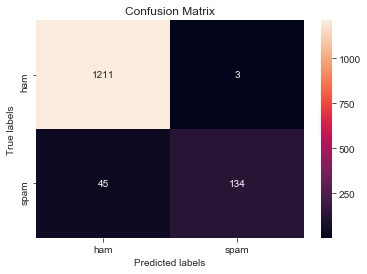

In [8]:
cm_1 = confusion_matrix(y_test_1, y_pred_1)
ax= plt.subplot()
sns.heatmap(cm_1, annot=True, ax = ax, fmt='d'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels'); ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['ham', 'spam']); ax.yaxis.set_ticklabels(['ham', 'spam']);

## review data again
- we actually have only 5k samples
- there is only one input for training

In [9]:
data.head()

,label,body,label_code
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives around here though",0


## create more training features

#### message length

In [10]:
data['len'] = data['body'].apply(lambda x : len(x) - x.count(" "))

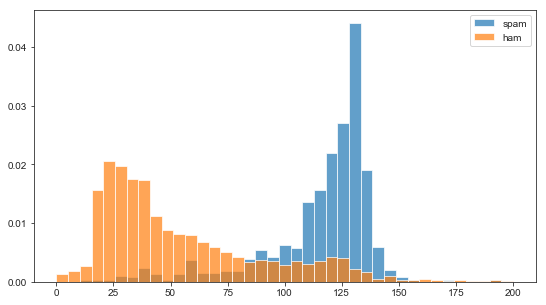

In [11]:

%matplotlib inline
pyplot.figure(figsize=(9,5))

bins = np.linspace(0,200,num=40)
pyplot.hist(data[data['label']=='spam']['len'],bins,alpha=0.7,label='spam', density=True)
pyplot.hist(data[data['label']=='ham']['len'],bins,alpha =0.7,label ='ham', density=True)
pyplot.legend(loc ='upper right')
pyplot.show()

### punctuation

In [12]:
import string
def count_punct (text):
    count = sum([1 for x in text if x in string.punctuation])
    pp = round(100*count/(len(text)-text.count(" ")),3)
    return pp

data['punct'] = data['body'].apply(lambda x : count_punct(x))

<function matplotlib.pyplot.show(*args, **kw)>

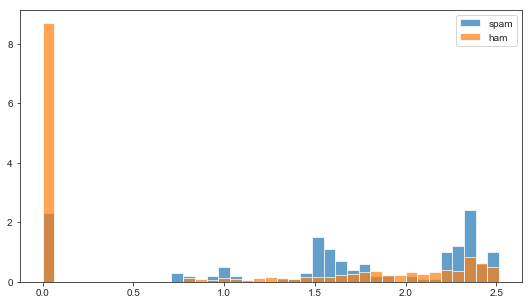

In [13]:
# punctuation 
%matplotlib inline
pyplot.figure(figsize=(9,5))
i=4
bins = np.linspace(0,40**(1/i),num=40)
pyplot.hist(data[data['label']=='spam']['punct'], bins, density=True,label ='spam', alpha=0.7)
pyplot.hist(data[data['label']=='ham']['punct'], bins, density = True, label='ham', alpha=0.7)
pyplot.legend(loc ='upper right')
pyplot.show

### website link

In [14]:
def website_count (text):
    return len(re.findall('www|http|com|\.co',text))

data['website_count'] = data['body'].apply(lambda x : website_count(x))

<function matplotlib.pyplot.show(*args, **kw)>

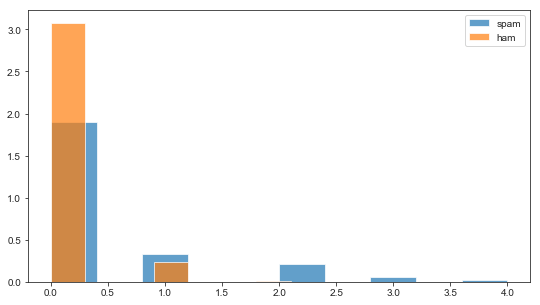

In [15]:
# website link
pyplot.figure(figsize=(9,5))
bins = np.linspace(0,10,num=40)
pyplot.hist(data[data['label']=='spam']['website_count'], density = True, label ='spam',alpha=0.7)
pyplot.hist(data[data['label']=='ham']['website_count'], density = True, label='ham',alpha=0.7)
pyplot.legend(loc ='upper right')
pyplot.show

### long/short number

In [16]:
data['long_number'] = data['body'].apply(lambda x : len(re.findall('\d{7,}',x)))
data['short_number'] = data['body'].apply(lambda x : len(re.findall('\d{4,6}',x)))

<function matplotlib.pyplot.show(*args, **kw)>

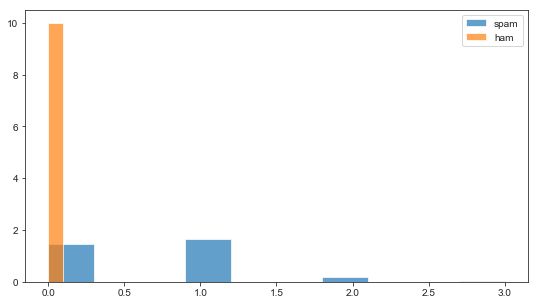

In [17]:
# long/short number
pyplot.figure(figsize=(9,5))
bins = np.linspace(0,10,num=40)
pyplot.hist(data[data['label']=='spam']['long_number'], density = True,label ='spam', alpha= 0.7)
pyplot.hist(data[data['label']=='ham']['long_number'], density = True, label='ham', alpha= 0.7)
pyplot.legend(loc ='upper right')
pyplot.show

<function matplotlib.pyplot.show(*args, **kw)>

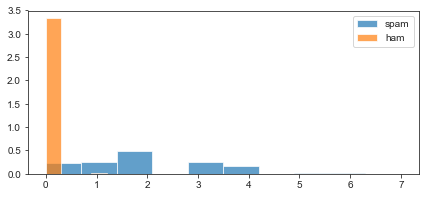

In [18]:
# short number
pyplot.figure(figsize=(7,3))
pyplot.hist(data[data['label']=='spam']['short_number'], density = True, label ='spam', alpha=0.7)
pyplot.hist(data[data['label']=='ham']['short_number'], density = True, label='ham', alpha=0.7)
pyplot.legend(loc ='upper right')
pyplot.show

### emoticon

<function matplotlib.pyplot.show(*args, **kw)>

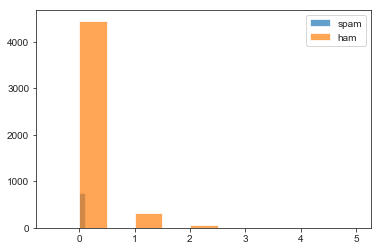

In [19]:
data['emoticon'] = data['body'].apply(lambda x : len(re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)', x)))
# emoticon
pyplot.hist(data[data['label']=='spam']['emoticon'], label ='spam', alpha=0.7)
pyplot.hist(data[data['label']=='ham']['emoticon'], label='ham', alpha=0.7)
pyplot.legend(loc ='upper right')
pyplot.show

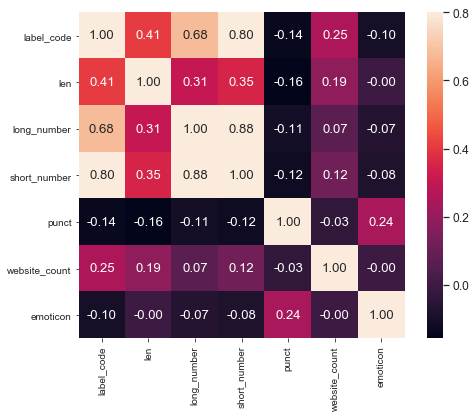

In [20]:
crcols = ['label_code', 'len', 'long_number', 'short_number', 'punct', 'website_count', 'emoticon']
corrmat = data[crcols].corr()
f, ax = plt.subplots(figsize=(8, 6))
sns.set(font_scale=1.1)
sns.heatmap(corrmat, annot=True, square=True, fmt='.2f', vmax=.8)


## training new model with extra features

In [21]:
#declare vector output
vector_output = vect.fit_transform(data['body'])
#concatenate new features
x_features = pd.concat([data['len'],data['long_number'],data['short_number'],data['punct'],
                        data['website_count'], data['emoticon'],pd.DataFrame(vector_output.toarray())],axis=1)

x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(x_features, data['label'], random_state=101)
rf = RandomForestClassifier(n_estimators=50, max_depth=None, n_jobs=-1)
rf_model = rf.fit(x_train_2,y_train_2)

In [22]:
y_pred_2 = rf_model.predict(x_test_2)
precision_2, recall_2, fscore_2, support_2 =score(y_test_2, y_pred_2, pos_label='spam', average ='binary')


print('First model - Precision : {} / Recall : {} / fscore : {} / Accuracy: {}'.format(round(precision_1,3),round(recall_1,3),round(fscore_1,3),round((y_pred_1==y_test_1).sum()/len(y_test_1),3)))
print('New model - Precision : {} / Recall : {} / fscore : {} / Accuracy: {}'.format(round(precision_2,3),round(recall_2,3),round(fscore_2,3),round((y_pred_2==y_test_2).sum()/len(y_test_2),3)))

First model - Precision : 0.978 / Recall : 0.749 / fscore : 0.848 / Accuracy: 0.966
New model - Precision : 0.987 / Recall : 0.86 / fscore : 0.919 / Accuracy: 0.981


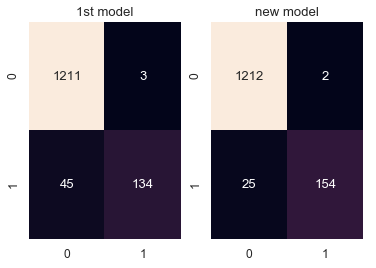

<Figure size 864x360 with 0 Axes>

In [23]:
cm_2 = confusion_matrix(y_test_2, y_pred_2)
#ax = plt.subplot()
fig, (ax1, ax2) = plt.subplots(1,2)
sns.heatmap(cm_1, annot=True, ax = ax1, fmt='d', cbar=False)
sns.heatmap(cm_2, annot=True, ax = ax2, fmt='d', cbar=False)
ax1.set_title('1st model'); 
ax2.set_title('new model');
plt.figure(figsize=(12,5))
plt.show()

[0.949748743718593, 0.9741564967695621, 0.9712849964106246, 0.9763101220387652, 0.9784637473079684, 0.9798994974874372, 0.9806173725771715, 0.9806173725771715]


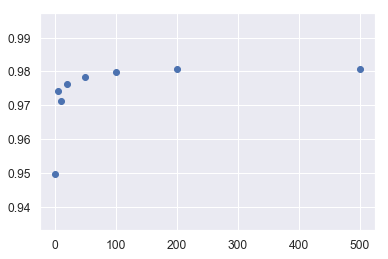

In [24]:
n = [1 ,5 ,10, 20, 50, 100, 200, 500]

result = []
from sklearn.metrics import accuracy_score
for i in n:
    rf = RandomForestClassifier(n_estimators=i, max_depth=None, n_jobs=-1)
    rf_model = rf.fit(x_train_2,y_train_2)
    predictions = rf_model.predict(x_test_2)
    result.append(accuracy_score(y_test_2, predictions))
# Last step let's plot n and result on a grid using plt.scatter()
plt.scatter(n, result)
print(result)

In [30]:
rf = RandomForestClassifier(n_estimators=100, max_depth=None, n_jobs=-1)
rf_model = rf.fit(x_train_2,y_train_2)
y_pred_3 = rf_model.predict(x_test_2)
precision_3, recall_3, fscore_3, support_3 =score(y_test_2, y_pred_3, pos_label='spam', average ='binary')
print('First model - Precision : {} / Recall : {} / fscore : {} / Accuracy: {}'.format(round(precision_1,3),round(recall_1,3),round(fscore_1,3),round((y_pred_1==y_test_1).sum()/len(y_test_1),3)))
print('New model - Precision : {} / Recall : {} / fscore : {} / Accuracy: {}'.format(round(precision_2,3),round(recall_2,3),round(fscore_2,3),round((y_pred_2==y_test_2).sum()/len(y_test_2),3)))
print('100 trees model - Precision : {} / Recall : {} / fscore : {} / Accuracy: {}'.format(round(precision_3,3),round(recall_3,3),round(fscore_3,3),round((y_pred_3==y_test_2).sum()/len(y_test_2),3)))

First model - Precision : 0.978 / Recall : 0.749 / fscore : 0.848 / Accuracy: 0.966
New model - Precision : 0.987 / Recall : 0.86 / fscore : 0.919 / Accuracy: 0.981
100 trees model - Precision : 0.993 / Recall : 0.849 / fscore : 0.916 / Accuracy: 0.98


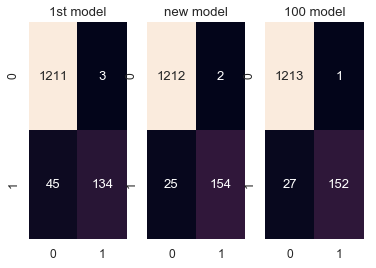

In [31]:
cm_3 = confusion_matrix(y_test_2, y_pred_3)

fig, (ax1, ax2, ax3) = plt.subplots(1,3)
sns.heatmap(cm_1, annot=True, ax = ax1, fmt='d', cbar=False)
sns.heatmap(cm_2, annot=True, ax = ax2, fmt='d', cbar=False)
sns.heatmap(cm_3, annot=True, ax = ax3, fmt='d', cbar=False)
ax1.set_title('1st model'); 
ax2.set_title('new model'); 
ax3.set_title('100 model');
plt.show()

### comparison with other classification methods

In [32]:
models = []
models.append(('LR1', LogisticRegression()))
models.append(('DTC', DecisionTreeClassifier()))
models.append(('RFC', RandomForestClassifier(n_estimators=100, max_depth=None, n_jobs=-1)))
models.append(('KNN', KNeighborsClassifier(n_neighbors=20)))
models.append(('ETC', ExtraTreeClassifier()))
#models.append(('SVC', SVC(kernel='sigmoid', gamma=1.0)))

# evaluate each model in turn
results = []
names = []

vectorizer = TfidfVectorizer("english")
X = x_features
y = data['label']
for name, model in models:
    kfold = model_selection.KFold(n_splits = 15, random_state = 7)
    cv_results = model_selection.cross_val_score(model, X, y, cv = kfold, scoring = 'roc_auc')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR1: 0.990973 (0.006015)
DTC: 0.953309 (0.013057)
RFC: 0.989189 (0.011095)
KNN: 0.945566 (0.021720)
ETC: 0.907384 (0.034278)


In [33]:
empty_list = []
ml_results_df = pd.DataFrame(results).T

for number, name in enumerate([x[0] for x in models]):
    ml_results_df = ml_results_df.rename(columns={number:name})
    
for i in ml_results_df.columns:
    averages = ml_results_df[i].mean()
    empty_list.append(averages)
    averages_df = pd.DataFrame(empty_list, columns=['Score'])
    
ml_classifiers = [x[0] for x in models]
averages_df.insert(loc=0, column='ML_Classifier', value=ml_classifiers)

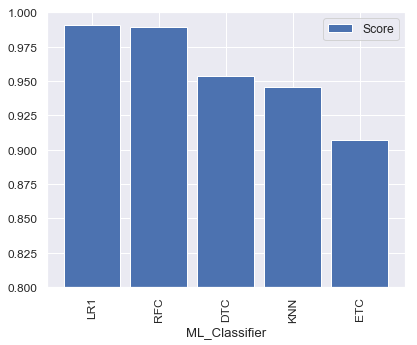

In [34]:
averages_df.groupby(['ML_Classifier']).sum().sort_values(by='Score',
                                                         ascending=False).plot(kind='bar', width=0.85, figsize=(6,5))
plt.ylim(0.8, 1)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

## extra visualizations

### top spaming words

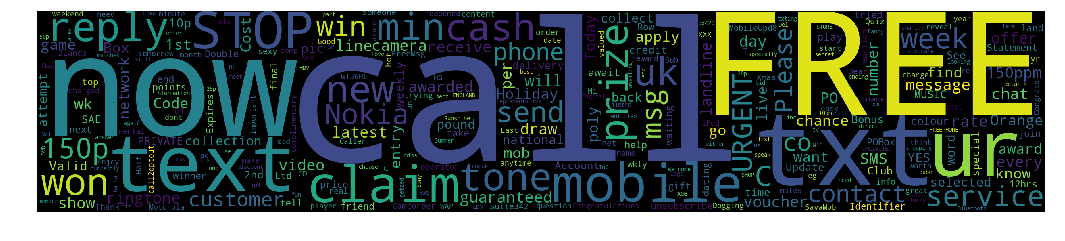

In [35]:
from wordcloud import WordCloud, STOPWORDS
stopwords_1 = set(STOPWORDS)
k = (' '.join(data[data['label'] == 'spam']['body']))
wordcloud = WordCloud(width = 2500, height = 500, collocations=False, 
                      max_words=300, stopwords=stopwords_1, relative_scaling=0.2).generate(k)
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')
plt.grid(False)
plt.tight_layout()
plt.show()

### top human words

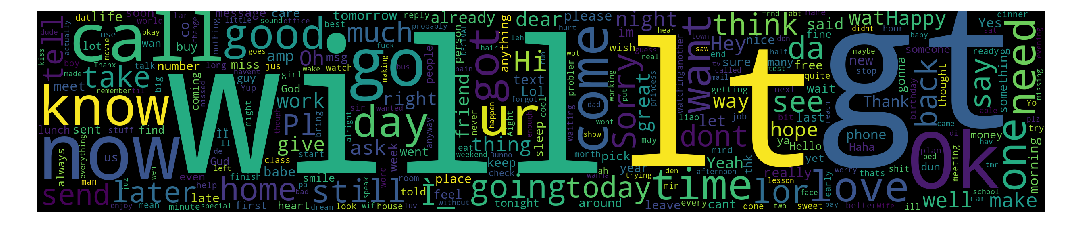

In [36]:
from wordcloud import WordCloud, STOPWORDS
stopwords_1 = set(STOPWORDS)
k = (' '.join(data[data['label'] == 'ham']['body']))
wordcloud = WordCloud(width = 2500, height = 500, collocations=False, 
                      max_words=300, stopwords=stopwords_1, relative_scaling=0.2).generate(k)
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')
plt.grid(False)
plt.tight_layout()
plt.show()